In [10]:
import numpy as np

from scipy.spatial.distance import cdist

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams['text.usetex'] = False

In [11]:
# Define the node representations

node_representations = np.array([
    np.array([1, 2, 5, 11], dtype=int),     # Node 1
    np.array([1, 3, 6, 12], dtype=int),     # Node 2
    np.array([1, 4, 8, 13], dtype=int),     # Node 3
    np.array([1, 3, 7, 14], dtype=int),     # Node 4
    np.array([1, 4, 9, 15], dtype=int),     # Node 5
    np.array([1, 2, 10, 16], dtype=int),    # Node 6
])

node_representations

array([[ 1,  2,  5, 11],
       [ 1,  3,  6, 12],
       [ 1,  4,  8, 13],
       [ 1,  3,  7, 14],
       [ 1,  4,  9, 15],
       [ 1,  2, 10, 16]])

In [12]:
# Compute the normalized distance matrix
dist_matrix_unscaled = cdist(
    node_representations, node_representations, metric='hamming')

dist_matrix_unscaled

array([[0.  , 0.75, 0.75, 0.75, 0.75, 0.5 ],
       [0.75, 0.  , 0.75, 0.5 , 0.75, 0.75],
       [0.75, 0.75, 0.  , 0.75, 0.5 , 0.75],
       [0.75, 0.5 , 0.75, 0.  , 0.75, 0.75],
       [0.75, 0.75, 0.5 , 0.75, 0.  , 0.75],
       [0.5 , 0.75, 0.75, 0.75, 0.75, 0.  ]])

In [13]:
# Typical distance in the collection
sigma = 0.75 
# We don't need to apply thresholding (taking into account the nature of the graph)
kappa = np.inf

# Define W
W = np.zeros_like(dist_matrix_unscaled)
for i in range(len(node_representations)):
    for j in range(i, len(node_representations)):
        W[i, j] = np.exp(-(dist_matrix_unscaled[i, j]**2 / (2*sigma**2)))
        W[j, i] = W[i, j]
W

array([[1.        , 0.60653066, 0.60653066, 0.60653066, 0.60653066,
        0.8007374 ],
       [0.60653066, 1.        , 0.60653066, 0.8007374 , 0.60653066,
        0.60653066],
       [0.60653066, 0.60653066, 1.        , 0.60653066, 0.8007374 ,
        0.60653066],
       [0.60653066, 0.8007374 , 0.60653066, 1.        , 0.60653066,
        0.60653066],
       [0.60653066, 0.60653066, 0.8007374 , 0.60653066, 1.        ,
        0.60653066],
       [0.8007374 , 0.60653066, 0.60653066, 0.60653066, 0.60653066,
        1.        ]])

In [14]:
# Define the diagonal matrix of W and the Laplacian L
D = np.zeros_like(W)
for i in range(len(node_representations)):
    D[i, i] = np.sum(W[i, :])

L = D - W
L

array([[ 3.22686004, -0.60653066, -0.60653066, -0.60653066, -0.60653066,
        -0.8007374 ],
       [-0.60653066,  3.22686004, -0.60653066, -0.8007374 , -0.60653066,
        -0.60653066],
       [-0.60653066, -0.60653066,  3.22686004, -0.60653066, -0.8007374 ,
        -0.60653066],
       [-0.60653066, -0.8007374 , -0.60653066,  3.22686004, -0.60653066,
        -0.60653066],
       [-0.60653066, -0.60653066, -0.8007374 , -0.60653066,  3.22686004,
        -0.60653066],
       [-0.8007374 , -0.60653066, -0.60653066, -0.60653066, -0.60653066,
         3.22686004]])

In [15]:
# Generate three different graph signals

# First one is going to have very similar values for similar node representations
signal_sim = np.array([0.95, 0.14, 0.61, 0.16, 0.58, 0.94])

# Second signal is going to have very different values for different node representations
signal_diff = np.array([0.95, 0.43, 0.61, 0.97, -0.77, -0.33])

# Third signal is going to be completely random
signal_random = np.random.randn(6)

# Forth signal with all equal values
signal_equal = np.array([0.5] * 6)

In [16]:
# Define the smoothness function
def smoothness(f, L):
    f = f[:, None]
    return f.T @ L @ f

In [17]:
print(smoothness(signal_sim, L))
print(smoothness(signal_diff, L))
print(smoothness(signal_random, L))
print(smoothness(signal_equal, L))

[[2.31382244]]
[[9.93578934]]
[[9.37278622]]
[[-5.55111512e-17]]


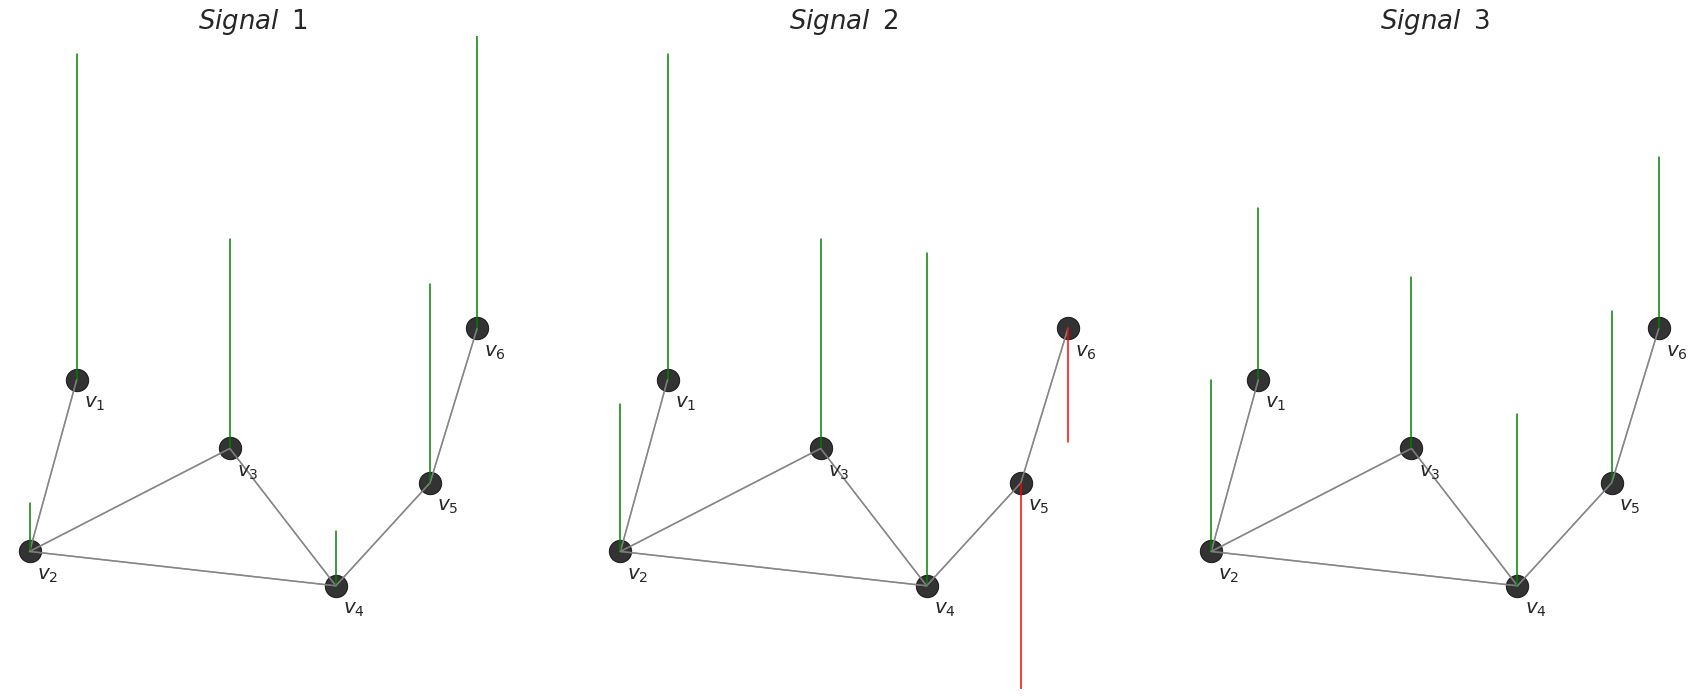

In [18]:
# Define the plotting points for the graph
plotting_points = [
    [1.2, 2.0],
    [1.0, 1.0],
    [1.85, 1.6],
    [2.3, 0.8],
    [2.7, 1.4],
    [2.9, 2.3]
]

adjacency_list = [
    [1],
    [0, 2, 3],
    [1, 3],
    [1, 2, 4],
    [3, 5],
    [4]
]

alpha = 60
def project(y, alpha):
    return y * (np.sin(np.deg2rad(180 - alpha - 90)) / np.sin(np.deg2rad(90)))

for i in range(len(plotting_points)):
    plotting_points[i][1] = project(y=plotting_points[i][1], alpha=alpha)

# Signal to use
SIGNAL = signal_random


fig, ax = plt.subplots(1, 3, figsize=(30, 12))

for s, SIGNAL in enumerate((signal_sim, signal_diff, signal_equal)):
    for i, node in enumerate(plotting_points):
        # Plot the edges
        for j in adjacency_list[i]:
            neighbor = plotting_points[j]
            ax[s].plot((node[0], neighbor[0]), (node[1], neighbor[1]), color='grey', alpha=0.8)
        # Plot the nodes
        ax[s].scatter(
            node[0], node[1], color='k', marker='o', s=500, alpha=0.8)
        # Plot the labels
        ax[s].annotate(fr'$v_{i + 1}$', (node[0] + 0.03, node[1] - 0.08), fontsize=20)
        # Plot the graph signal
        ax[s].plot((node[0], node[0]), (node[1], node[1] + SIGNAL[i]), color='green' if SIGNAL[i] >= 0 else 'red')
        # Set extra parameters
        ax[s].set_title(fr'$Signal \; \; {s + 1}$', fontsize=26)
        ax[s].set_ylim(bottom=0.1, top=2)
        ax[s].grid(False)
        ax[s].axis('off')


plt.show()

In [ ]:
print(matplotlib.rcParams['text.usetex'])

True


In [ ]:
!apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  ghostscript gsfonts javascript-common libcupsfilters1 libcupsimage2 libgs9
  libgs9-common libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0
  libptexenc1 libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-did-you-mean
  ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apache2 | lighttpd | httpd poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming font

In [ ]:
!pip install latex